In [3]:
import pandas as pd
import scipy.stats as stats


# Load the dataset and create a DataFrame
df = pd.read_csv('insurance.csv')

# Display the data
print(df)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [4]:
 # Check what is in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Check for missing values in the DataFrame
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [28]:

# Check how many values there are in the smoker column
smoker_counts = df['smoker'].value_counts()

print (smoker_counts)
print ('The samples are imbalanced')

no     1064
yes     274
Name: smoker, dtype: int64
The samples are imbalanced


In [30]:
# Calculate the mean and the median
mean_expenses_by_smoker = df.groupby('smoker')['expenses'].mean()
median_expenses_by_smoker = df.groupby('smoker')['expenses'].median()

# Display the mean and median expenses for 'yes' and 'no' categories
print("Mean Expenses:")
print(mean_expenses_by_smoker)

print("\nMedian Expenses:") # "\n" = Line break 
print(median_expenses_by_smoker)


Mean Expenses:
smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64

Median Expenses:
smoker
no      7345.405
yes    34456.350
Name: expenses, dtype: float64


In [40]:
## Two-sample t-test

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

# Define your significance level (alpha)
alpha = 0.05

# Output the results based on my hypotheses
if p_value < alpha:
    print("Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("Fail to reject the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).")
else:
    print("Fail to reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("There is no evidence to support the alternative hypothesis (HA).")

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).
Fail to reject the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).
T-Statistic: 46.6649210792002
P-Value: 8.271449574495316e-283


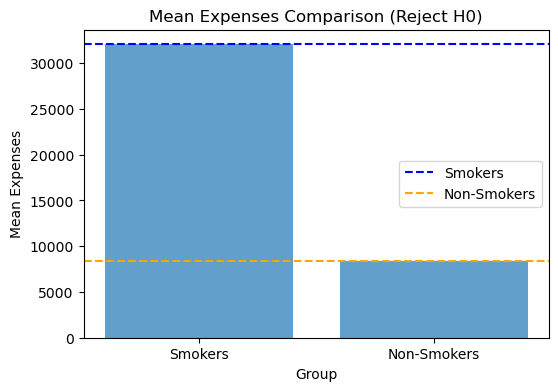

T-Statistic: 32.751887340417625
P-Value: 5.889487102677626e-103


In [46]:
import matplotlib.pyplot as plt
from scipy import stats

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

# Define your significance level (alpha)
alpha = 0.05

# Output the results based on my hypotheses
if p_value < alpha:
    result = "Reject"
else:
    result = "Fail to reject"

# Create a bar chart to visualize the results
plt.figure(figsize=(6, 4))
plt.bar(['Smokers', 'Non-Smokers'], [expenses_smokers.mean(), expenses_non_smokers.mean()], alpha=0.7)
plt.xlabel('Group')
plt.ylabel('Mean Expenses')
plt.title(f'Mean Expenses Comparison ({result} H0)')
plt.axhline(y=expenses_smokers.mean(), color='blue', linestyle='--', label='Smokers')
plt.axhline(y=expenses_non_smokers.mean(), color='orange', linestyle='--', label='Non-Smokers')
plt.legend()
plt.show()

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

In [44]:
## Welch's t-test

# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform the Welch's T-Test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers, equal_var=False)

# Define your significance level (alpha)
alpha = 0.05

# Output the results based on the Welch's T-Test
if p_value < alpha:
    print("Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("There is strong evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).")
else:
    print("Fail to reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).")
    print("There is no evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).")

# Print the t-statistic and p-value
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


Reject the null hypothesis (H0): Smoking status does not have an effect on insurance expenses (μ1 = μ2).
There is strong evidence to support the alternative hypothesis (HA): Smoking status has an effect on insurance expenses (μ1 ≠ μ2).
T-Statistic: 32.751887340417625
P-Value: 5.889487102677626e-103


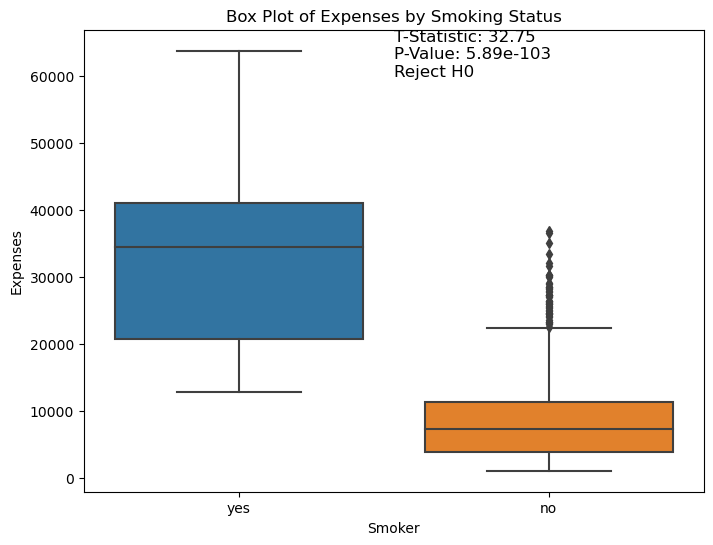

In [45]:
# Separate the data for smokers and non-smokers
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform the Welch's T-Test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers, equal_var=False)

# Create a box plot to visualize the data
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title("Box Plot of Expenses by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Expenses")

# Print the t-statistic and p-value
if p_value < 0.05:
    plt.text(0.5, 0.9, f'T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}\nReject H0', transform=plt.gca().transAxes, fontsize=12)
else:
    plt.text(0.5, 0.9, f'T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}\nFail to Reject H0', transform=plt.gca().transAxes, fontsize=12)

plt.show()
